In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy.sparse as sps
from sklearn.feature_selection import SelectFromModel
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import itertools

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = (8,8)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin = 0.0, vmax = 1.0)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
bins0 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.5632754522868506],
        [9.5632754522868506, np.inf]]
bnames0 = ['very bad', 'bad', 'average', 'good', 'very good']

bins5 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames5 = ['very bad', 'bad', 'average', 'good', 'very good']

bins4 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames4 = ['bad', 'average', 'good', 'very good']

bins3 = [[-np.inf, 8],
        [8,9.5],
        [9.5, np.inf]]
bnames3 = ['bad', 'average', 'good']

bins2 = [[-np.inf, 9],
        [9, np.inf]]

bnames2 = ['below', 'above']

In [4]:
binsCheat = [[-np.inf, 7],
        [7, 7.5],
        [7.5, 9.5],
        [9.5, 9.8],
        [9.9, np.inf]]
bnamesCheat = ['very bad', 'bad', 'average', 'good', 'very good']

In [5]:
def scoreLabel(x, bins):
    for i in range(len(bins)):
        if bins[i][0] < x <= bins[i][1]:
            return i

In [6]:
#featureMatrix = sps.load_npz('./Datasets_2/Regression_Features.npz')
featureMatrix = sps.load_npz('./Week7Dataset/Regression_Feat_Selection_VarThr.npz')
labels = np.load('./Week7Dataset/Regression_Labels.npz')['arr_0']

In [7]:
bins = bins5
bnames = bnames5
#fname = 'bin2classification.png'

#clsLabels = np.array([scoreLabelOneHot(i, bins) for i in labels])
clsLabels = np.array([scoreLabel(i, bins) for i in labels])

cnt = collections.Counter(clsLabels)
i = 0
for c in cnt:
    print bnames[i], 1.0 * cnt[c] / len(clsLabels)
    i+=1

very bad 0.203876923579
bad 0.127341526467
average 0.15977426747
good 0.260024628332
very good 0.248982654151


In [8]:
train, test, train_labels, test_labels = train_test_split(featureMatrix,clsLabels,test_size=.33,random_state=42)
train = MaxAbsScaler().fit_transform(train)
test = MaxAbsScaler().fit_transform(test)

In [9]:
train_stp1 = train.copy()
train_l_stp1 = train_labels.copy()
train_l_stp1[np.where(np.logical_and(train_l_stp1>=1, train_l_stp1<=3))] = 1
train_l_stp1[train_l_stp1 == 4] = 2

train_stp2 = train[np.where(np.logical_and(train_labels>=1, train_labels<=3))].copy()
train_l_stp2 = train_labels[np.where(np.logical_and(train_labels>=1, train_labels<=3))].copy() - 1

In [10]:
test_stp1 = test.copy()
test_l_stp1 = test_labels.copy()
test_l_stp1[np.where(np.logical_and(test_l_stp1>=1, test_l_stp1<=3))] = 1
test_l_stp1[test_l_stp1 == 4] = 2

test_stp2 = test[np.where(np.logical_and(test_labels>=1, test_labels<=3))].copy()
test_l_stp2 = test_labels[np.where(np.logical_and(test_labels>=1, test_labels<=3))].copy() - 1

In [11]:
#cls1 = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
#cls1 = OneVsRestClassifier(LogisticRegression(class_weight='balanced', random_state=0))
cls1 = LogisticRegression(solver = 'lbfgs', class_weight='balanced', random_state=0, multi_class= 'multinomial')
cls1.fit(train_stp1, train_l_stp1)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [12]:
#cls2 = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
#cls2 = OneVsRestClassifier(LogisticRegression(class_weight='balanced', random_state=0))
cls2 = LogisticRegression(solver = 'lbfgs', class_weight='balanced', random_state=0, multi_class= 'multinomial')
cls2.fit(train_stp2, train_l_stp2)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

Normalized confusion matrix
[[ 0.78996069  0.18070759  0.02933172]
 [ 0.2270313   0.46798508  0.30498361]
 [ 0.05309647  0.22891028  0.71799325]]


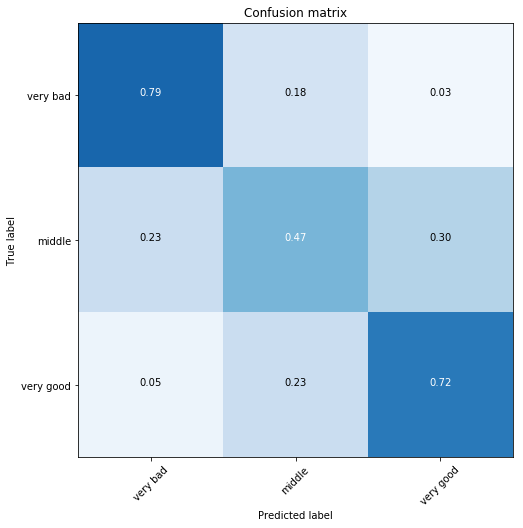

In [13]:
pred_stp1 = cls1.predict(test_stp1)
cm = confusion_matrix(test_l_stp1,pred_stp1).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'middle', 'very good'], normalize=True)
plt.savefig('exp1_lreg_multinom')
plt.show()

Normalized confusion matrix
[[ 0.41247951  0.45896422  0.12855627]
 [ 0.24551692  0.52806799  0.22641509]
 [ 0.12441805  0.43581948  0.43976247]]


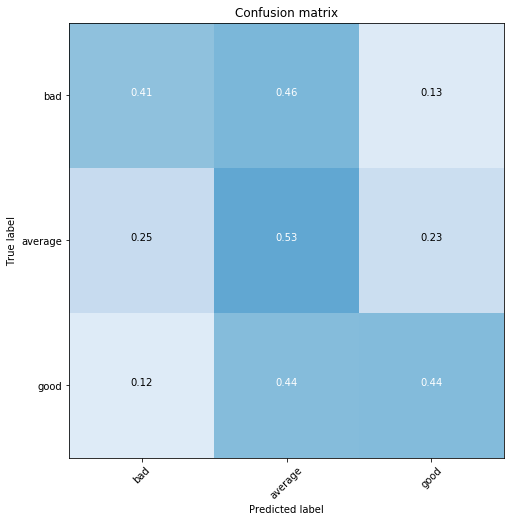

In [14]:
pred_stp2 = cls1.predict(test_stp2)
cm = confusion_matrix(test_l_stp2,pred_stp2).astype(float)
plot_confusion_matrix(cm.astype(np.int),['bad', 'average', 'good'], normalize=True)
plt.savefig('exp2_lreg_multinom')
plt.show()

Normalized confusion matrix
[[ 0.78996069  0.07880254  0.06973087  0.03217418  0.02933172]
 [ 0.41247951  0.15748867  0.18825345  0.1132221   0.12855627]
 [ 0.24551692  0.1362077   0.21557773  0.17628255  0.22641509]
 [ 0.12441805  0.08826603  0.15463183  0.19292162  0.43976247]
 [ 0.05309647  0.04674474  0.07180429  0.11036125  0.71799325]]


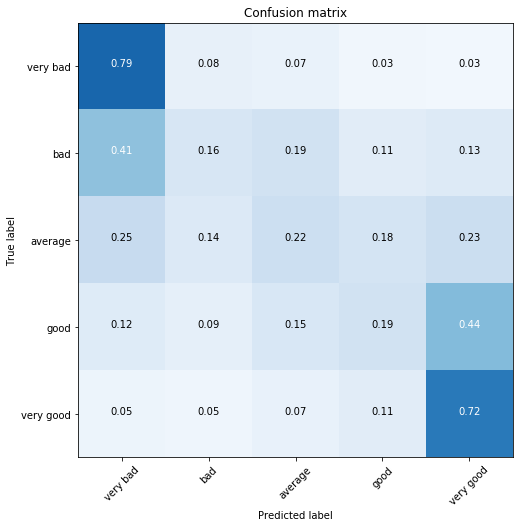

In [15]:
pred1 = cls1.predict(test_stp1)
midPredicted = test[np.where(pred1 == 1)]
pred2 = cls2.predict(midPredicted)
finPred = pred1*2
finPred[finPred == 2] = pred2 + 1

cm = confusion_matrix(test_labels, finPred).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'bad', 'average', 'good', 'very good'], normalize=True)
plt.savefig('overall_lreg_multinom')
plt.show()